Data analysis of single ion's unitary dynamics:

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import Qsim.operator.spin as spin
import Qsim.operator.phonon as phon
import Qsim.ion_chain.transfer.elec_transfer as etrans
from  Qsim.ion_chain.ion_system import *
import Qsim.operator.spin_phonon as sp_op
import Qsim.ion_chain.interaction.dissipation as disp
import Qsim.ion_chain.interaction.spin_phonon as sp_ph
from scipy.optimize import curve_fit

plt.rcParams['figure.dpi']= 200

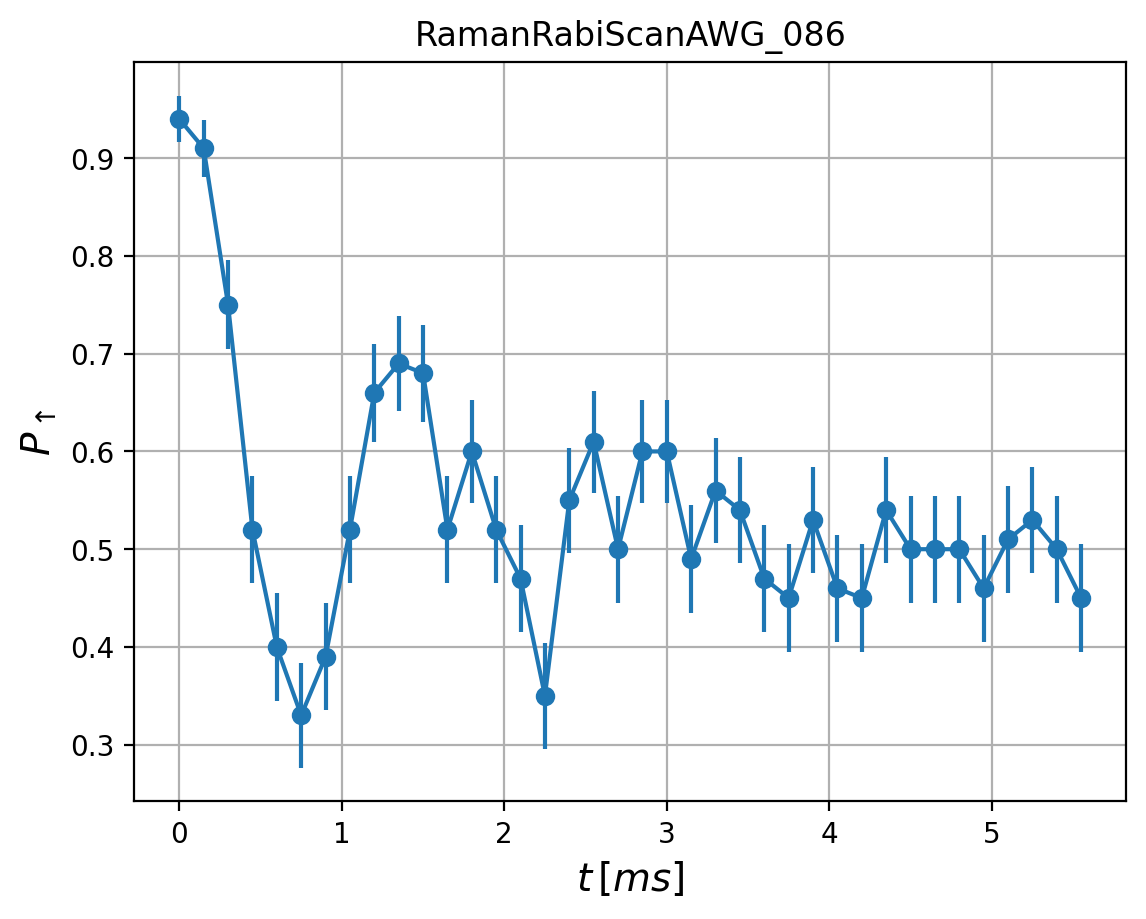

In [2]:
#Import and check the data
filename="RamanRabiScanAWG_086"
data=np.loadtxt(filename, dtype=float, comments='#')
x=data[:,2];y=data[:,3];error=data[:,6]

fig1 = plt.figure()
plt.errorbar(x, y, yerr=error,fmt='-o')
title = str(filename)
plt.xlabel(r'$t\,[ms]$',fontsize = 14)
plt.ylabel(r'$P_{\uparrow}$',fontsize = 14)
plt.title(title)
plt.grid() 
plt.show()

In [3]:
def mesolveUnitarydecay_func(times, n0, omegax, omegay, omegaz,tau):
    
    #Create controllable single-ion system
    delta = 10 #detuning from com mode
    ion_sys = ions(trap_config = {'N':1,'fx':3.2,'fz':1.0}) #construct a single ion system using class ions
    ion_sys.coolant = [0] #ion 2 as coolant
    ion_sys.active_phonon = [[0]] #consider only com mode
    ion_sys.active_spin = [0]
    ion_sys.pcut = [[20]]
    ion_sys.update_all(print_text = False)
    #ion_sys.list_para() #print parameters of the system
    
    #Create spin-phonon laser coupling
    laser1 = Laser()
    laser1.Omega_eff = 5
    laser1.wavevector = 1 
    laser1.laser_couple = [0]
    laser1.phase = np.pi/2 #to get sigma_y
    laser1.mu = 1e3*ion_sys.fx-delta #couple to com mode
    #laser1.list_para()
    
    nbath= 0.1
    df_p = 1 #for phonon measurements
    elist = [sp_op.spin_measure(ion_sys,[0]),
         sp_op.phonon_measure(ion_sys,df_p, mindex=0) #com mode population
    ]
    rho0 = sp_op.rho_thermal(ion_sys, nbar_list = [[n0]], s_state=[0], ket = False)
    clist1 = disp.cooling(ion_sys,gamma_list = [0], nbar_list = [nbath], df=1, normalized = False)
    H0  = etrans.H_res(ion_sys,laser1, Omegax = omegax, Omegay = omegay, Omegaz = omegaz, i_type=0)#i_type=0->zz, i_type=1->laser phase (0 for x, pi/2 for y)
    
    result = mesolve(H0,rho0,times,clist1,elist,progress_bar=None,options=Options(nsteps=100000)).expect[0]*np.exp(-times/tau)
    return result

In [4]:
#Fitting

guess = [0.5,1,0, 10, 3]
parameters, covariance = curve_fit(mesolveUnitarydecay_func, x, y, p0=guess,bounds=([0.2,0.9,-0.2,9,1],[1,1.1,0.2,11,20]))
fit_n0 = parameters[0]
fit_omegax = parameters[1]
fit_omegay = parameters[2]
fit_omegaz = parameters[3]
fit_tau = parameters[4]

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.
Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space se

Trap coefficients updated
Anharmonic coefficients updated
_____________________________________________________________
Checking phonon space setup
Phonon space setups are consistent
_____________________________________________________________
Phonon space parameters updated
Cooling parameters updated
Trap parametric modulation updated
Ions class object initialized.
Laser parameters updated
Lasers class object initialized.


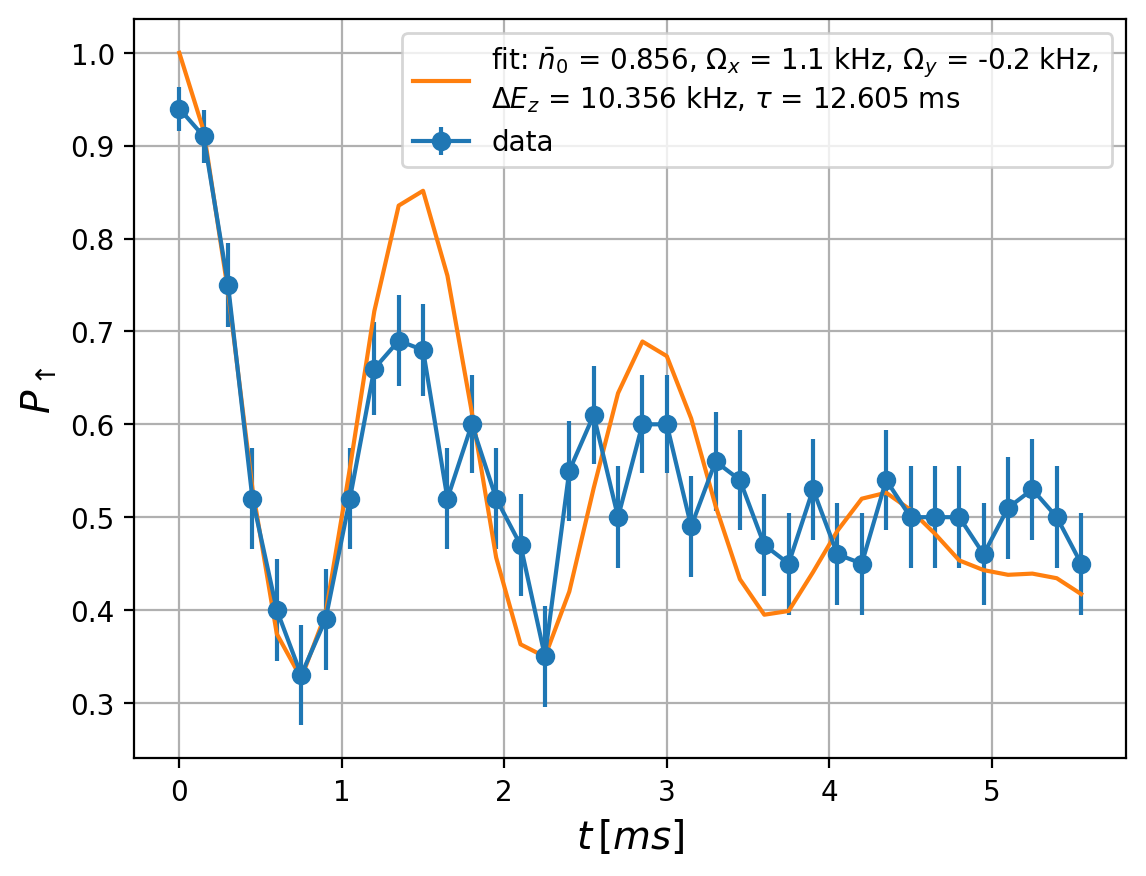

In [5]:
#plot results

fit_mesolveUnitarydecay_func = mesolveUnitarydecay_func(x, fit_n0,fit_omegax,fit_omegay, fit_omegaz,fit_tau)
parameters
fitlegend='fit: '+r'$\bar{n}_{0}$ = '+str(round(fit_n0,3))+', '+ r'$\Omega_{x}$ = '+str(round(fit_omegax,3))+' kHz, '+ r'$\Omega_{y}$ = '+str(round(fit_omegay,3))+' kHz, '+'\n' +r'$\Delta E_{z}$ = '+str(round(fit_omegaz,3))+' kHz, '+r'$\tau$ = '+str(round(fit_tau,3))+' ms'
plt.errorbar(x, y, yerr=error,fmt='-o',label='data')
plt.plot(x, fit_mesolveUnitarydecay_func, '-', label=fitlegend)
plt.legend()
plt.xlabel(r'$t\, [ms]$',fontsize = 14)
plt.ylabel(r'$P_{\uparrow}$',fontsize = 14)
plt.grid() 
plt.show()